In [ ]:
import requests, os, zipfile

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"
    session = requests.Session()
    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)
    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)
    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value
    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768
    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: 
                f.write(chunk)
                
def unzip(file):
    zip_ref = zipfile.ZipFile(file, 'r')
    zip_ref.extractall('/tmp')
    zip_ref.close()

download_file_from_google_drive('1N4hmUQDJuimnB-98l8NGrNMo7eghNN1Y', '/tmp/flowers10.zip')
unzip('/tmp/flowers10.zip')

In [ ]:
base_dir = '/tmp/flowers10/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
import glob
import numpy as np

train_images = glob.glob(os.path.join(train_dir,'*', '*.jpg'))
validation_images = glob.glob(os.path.join(validation_dir,'*', '*.jpg'))

train_classes = [os.path.basename(os.path.dirname(x)) for x in train_images]
validation_classes = [os.path.basename(os.path.dirname(x)) for x in validation_images]

assert len(set(train_classes))==len(set(validation_classes)), 'Class mismatch between train and val'
classes = set(train_classes)
num_classes = len(classes)

for class_ in classes:
  print('Class {}: training images: {}, validation images: {}'.format(class_, train_classes.count(class_), validation_classes.count(class_)))
print('\nTotal training images:', len(train_images))
print('Total validation images:', len(validation_images))
print('Number of classes:', num_classes)

Class 7: training images: 80, validation images: 20
Class 21: training images: 80, validation images: 20
Class 259: training images: 80, validation images: 20
Class 85: training images: 80, validation images: 20
Class 129: training images: 80, validation images: 20
Class 141: training images: 80, validation images: 20
Class 60: training images: 80, validation images: 20
Class 156: training images: 80, validation images: 20
Class 38: training images: 80, validation images: 20
Class 117: training images: 80, validation images: 20

Total training images: 800
Total validation images: 200
Number of classes: 10


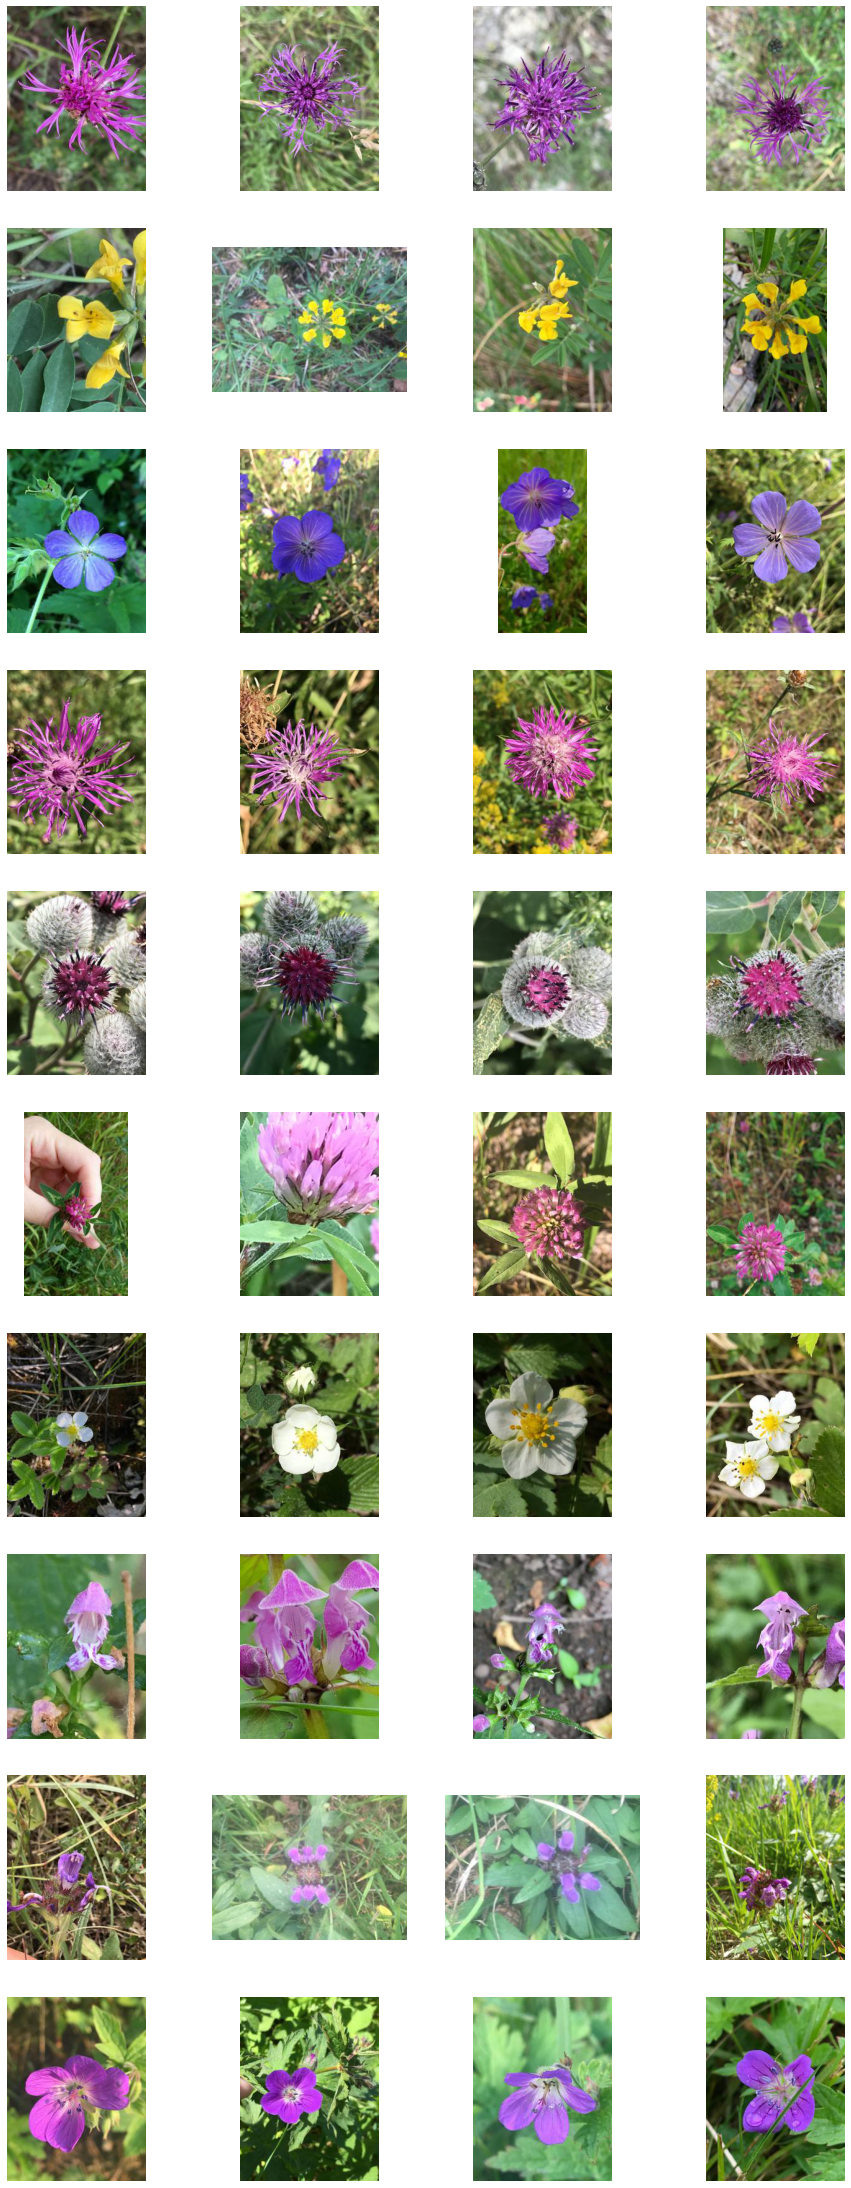

In [ ]:
% matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = num_classes
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

for row, class_ in enumerate(classes):
  class_images = [img for img,label in zip(validation_images, validation_classes) if label==class_]
  for col in range(ncols):
    sp = plt.subplot(nrows, ncols, row*ncols+col+1)
    sp.axis('Off')
    img = mpimg.imread(class_images[col])
    plt.imshow(img)
    
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
val_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
!find $base_dir -type d | sed -e "s/[^-][^\/]*\//  |/g" -e "s/|\([^ ]\)/|-\1/"

  |  |
  |  |-val
  |  |  |-21
  |  |  |-7
  |  |  |-85
  |  |  |-60
  |  |  |-259
  |  |  |-117
  |  |  |-156
  |  |  |-38
  |  |  |-141
  |  |  |-129
  |  |-train
  |  |  |-21
  |  |  |-7
  |  |  |-85
  |  |  |-60
  |  |  |-259
  |  |  |-117
  |  |  |-156
  |  |  |-38
  |  |  |-141
  |  |  |-129


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 32
train_generator = train_datagen.flow_from_directory('/tmp/flowers10/train',target_size=(150, 150),batch_size=32,class_mode='categorical')
validation_generator = val_datagen.flow_from_directory('/tmp/flowers10/val',target_size=(150, 150),batch_size=32,class_mode='categorical') 

Found 800 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [ ]:
batch = validation_generator.next()

for label_el, batch_el in zip(('x','y'), batch):
  print('{} shape: {}'.format(label_el, batch_el.shape))
  print('{} example: {}'.format(label_el, batch_el[0]))
  print()
  
validation_generator.reset()

x shape: (32, 150, 150, 3)
x example: [[[0.4156863  0.3921569  0.20392159]
  [0.4039216  0.41176474 0.21960786]
  [0.39607847 0.41960788 0.2392157 ]
  ...
  [0.5882353  0.62352943 0.4156863 ]
  [0.57254905 0.59607846 0.42352945]
  [0.5294118  0.5294118  0.39607847]]

 [[0.43921572 0.43137258 0.23137257]
  [0.43137258 0.44705886 0.2509804 ]
  [0.39607847 0.427451   0.23529413]
  ...
  [0.7058824  0.7372549  0.5372549 ]
  [0.6901961  0.70980394 0.54901963]
  [0.6313726  0.627451   0.5058824 ]]

 [[0.4431373  0.454902   0.23137257]
  [0.42352945 0.45882356 0.24313727]
  [0.3803922  0.43529415 0.227451  ]
  ...
  [0.6862745  0.70980394 0.52156866]
  [0.69803923 0.7058824  0.5529412 ]
  [0.7176471  0.7137255  0.59607846]]

 ...

 [[0.2392157  0.34509805 0.14509805]
  [0.36862746 0.4784314  0.28627452]
  [0.34509805 0.454902   0.2627451 ]
  ...
  [0.69411767 0.7725491  0.5254902 ]
  [0.69803923 0.77647066 0.54509807]
  [0.62352943 0.6901961  0.4784314 ]]

 [[0.34117648 0.4431373  0.25490198]

In [ ]:
from tensorflow.keras import layers, Model

def build_model(num_classes, input_shape=(150, 150, 3)):

 input_img = layers.Input(shape=input_shape)
 x = tf.keras.layers.Conv2D( filters = 16 , kernel_size = 3 , strides = (1,1) , padding = 'same', activation = tf.keras.activations.relu)(input_img)
 x = tf.keras.layers.MaxPool2D(pool_size=(2,2),strides = 2, padding= 'valid')(x)
 x = tf.keras.layers.Conv2D(filters = 32, kernel_size = 3 , strides = (1,1) , padding ='same', activation=tf.keras.activations.relu)(x)
 x = tf.keras.layers.MaxPool2D(pool_size=(2,2),strides = 2, padding='valid')(x)  
 x = tf.keras.layers.Conv2D(filters= 64,kernel_size = 3,strides = (1,1), padding='same', activation=tf.keras.activations.relu)(x)
 x = tf.keras.layers.GlobalMaxPool2D()(x)
 output= layers.Dense(num_classes,'softmax')(x)  

 model = Model(input_img, output)
 return model

In [ ]:
model = build_model(num_classes)
print(model.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
global_max_pooling2d (Global (None, 64)               

In [ ]:
from tensorflow.keras.optimizers import Adam

learning_rate = 3e-4

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=learning_rate),
              metrics=['accuracy'])

In [ ]:
train_steps = np.ceil(train_generator.samples / train_generator.batch_size) 
val_steps = np.ceil(validation_generator.samples / validation_generator.batch_size)  

history = model.fit(train_generator,
                    steps_per_epoch=train_steps,
                    epochs=100,
                    validation_data=validation_generator,
                    validation_steps=val_steps,
                    verbose=2)

Epoch 1/100
25/25 - 2s - loss: 2.3144 - accuracy: 0.0988 - val_loss: 2.2766 - val_accuracy: 0.2450
Epoch 2/100
25/25 - 2s - loss: 2.2678 - accuracy: 0.2362 - val_loss: 2.2445 - val_accuracy: 0.2300
Epoch 3/100
25/25 - 2s - loss: 2.2200 - accuracy: 0.2387 - val_loss: 2.1796 - val_accuracy: 0.3100
Epoch 4/100
25/25 - 2s - loss: 2.1317 - accuracy: 0.3275 - val_loss: 2.0797 - val_accuracy: 0.3350
Epoch 5/100
25/25 - 2s - loss: 2.0031 - accuracy: 0.3800 - val_loss: 1.9325 - val_accuracy: 0.3450
Epoch 6/100
25/25 - 2s - loss: 1.8375 - accuracy: 0.4462 - val_loss: 1.7323 - val_accuracy: 0.4400
Epoch 7/100
25/25 - 2s - loss: 1.6387 - accuracy: 0.5100 - val_loss: 1.5513 - val_accuracy: 0.4550
Epoch 8/100
25/25 - 2s - loss: 1.4720 - accuracy: 0.5200 - val_loss: 1.3987 - val_accuracy: 0.5250
Epoch 9/100
25/25 - 1s - loss: 1.3192 - accuracy: 0.5638 - val_loss: 1.2934 - val_accuracy: 0.5600
Epoch 10/100
25/25 - 2s - loss: 1.2223 - accuracy: 0.5863 - val_loss: 1.2260 - val_accuracy: 0.5700
Epoch 11/

In [ ]:
from matplotlib import pyplot as plt

def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, dpi=150)
  ax1.plot(history.history['loss'], label='training')
  ax1.plot(history.history['val_loss'], label='validation')
  ax1.set_ylabel('Cross-Entropy Loss')
  ax1.set_yscale('log')
  if history.history.__contains__('lr'):
    ax1b = ax1.twinx()
    ax1b.plot(history.history['lr'], 'g-', linewidth=1)
    ax1b.set_yscale('log')
    ax1b.set_ylabel('Learning Rate', color='g')

  ax2.plot(history.history['accuracy'], label='training')
  ax2.plot(history.history['val_accuracy'], label='validation')
  ax2.set_ylabel('Accuracy')
  ax2.set_xlabel('Epochs')
  ax2.legend()
  plt.show()

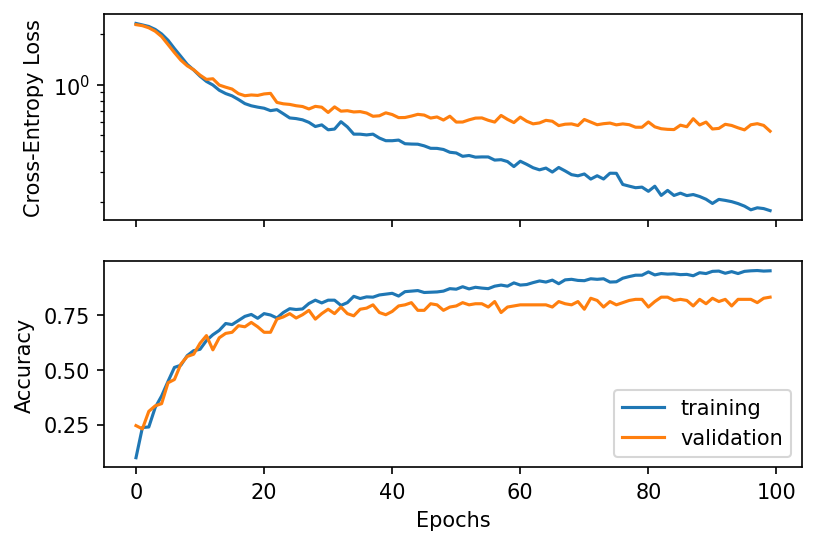

In [ ]:
plot_history(history)

In [ ]:
train_datagen = ImageDataGenerator( width_shift_range = 0.1 , height_shift_range = 0.1 , rotation_range = 20 , brightness_range = (0.5,1.5) ,
                                   horizontal_flip=True,vertical_flip=True, zoom_range = 0.4 , fill_mode= 'nearest',rescale=1./255  )

In [ ]:
train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150,150),
                    batch_size=batch_size,
                    class_mode='categorical',
                    shuffle=True,
                    seed=42)

Found 800 images belonging to 10 classes.


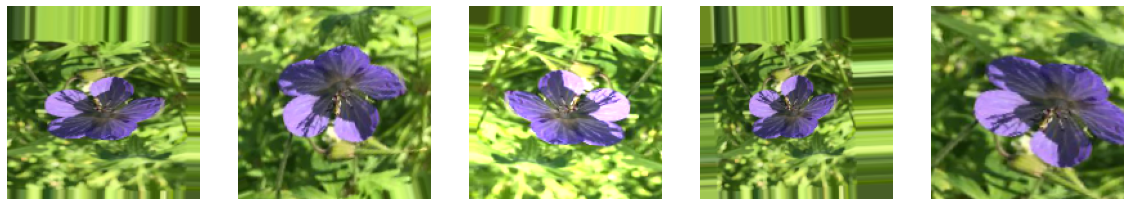

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img_path = train_images[int(np.random.random() * len(train_images))]
img = load_img(img_path, target_size=(150,150)) 
x = img_to_array(img) 
x = x.reshape((1,) + x.shape) 

n_runs = 5
fig = plt.gcf()
fig.set_size_inches(n_runs*4,4)

i=0
for batch in train_datagen.flow(x, batch_size=1):
  sp = plt.subplot(1, n_runs, i+1)
  sp.axis('Off')
  plt.imshow(array_to_img(batch[0]))
  i+=1
  if i % n_runs == 0:
    break
    
plt.show()

Epoch 1/100
25/25 - 5s - loss: 2.3145 - accuracy: 0.0975 - val_loss: 2.2902 - val_accuracy: 0.1000
Epoch 2/100
25/25 - 5s - loss: 2.2834 - accuracy: 0.1650 - val_loss: 2.2559 - val_accuracy: 0.2650
Epoch 3/100
25/25 - 5s - loss: 2.2346 - accuracy: 0.2175 - val_loss: 2.1834 - val_accuracy: 0.2050
Epoch 4/100
25/25 - 5s - loss: 2.1398 - accuracy: 0.2412 - val_loss: 2.0379 - val_accuracy: 0.2750
Epoch 5/100
25/25 - 5s - loss: 1.9778 - accuracy: 0.2775 - val_loss: 1.8527 - val_accuracy: 0.3900
Epoch 6/100
25/25 - 5s - loss: 1.7807 - accuracy: 0.4475 - val_loss: 1.6142 - val_accuracy: 0.5800
Epoch 7/100
25/25 - 5s - loss: 1.5965 - accuracy: 0.5138 - val_loss: 1.4733 - val_accuracy: 0.5450
Epoch 8/100
25/25 - 5s - loss: 1.4227 - accuracy: 0.5562 - val_loss: 1.2799 - val_accuracy: 0.6350
Epoch 9/100
25/25 - 5s - loss: 1.2711 - accuracy: 0.6212 - val_loss: 1.1748 - val_accuracy: 0.5950
Epoch 10/100
25/25 - 5s - loss: 1.1655 - accuracy: 0.6187 - val_loss: 1.0907 - val_accuracy: 0.6500
Epoch 11/

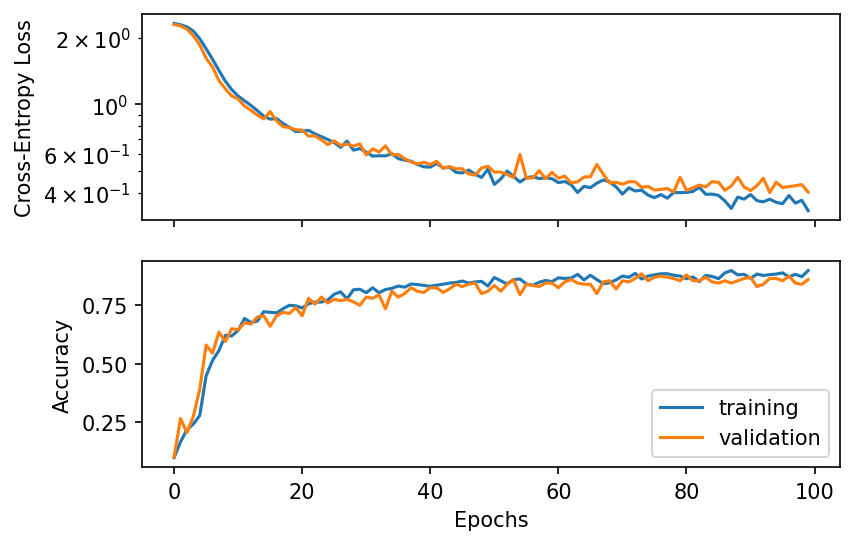

In [ ]:
model = build_model(num_classes)

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=learning_rate),
              metrics=['accuracy'])

history = model.fit(train_generator,
                    steps_per_epoch=train_steps,
                    epochs=100,
                    validation_data=validation_generator,
                    validation_steps=val_steps,
                    verbose=2)

plot_history(history)

In [ ]:
def build_model_with_dropout(num_classes, input_shape=(150,150,3), learning_rate=1e-3, summary=True):

  input_img = layers.Input(shape=input_shape)

  x = tf.keras.layers.Conv2D( filters = 16 , kernel_size = 3 , strides = (1,1) , padding = 'same', activation = tf.keras.activations.relu)(input_img)
  x = tf.keras.layers.MaxPool2D(pool_size=(2,2),strides = 2, padding= 'valid')(x)

  x = tf.keras.layers.Conv2D( filters = 32 , kernel_size = 3 , strides = (1,1) , padding = 'same', activation = tf.keras.activations.relu)(x)
  x = tf.keras.layers.MaxPool2D(pool_size=(2,2),strides = 2, padding= 'valid')(x)
  
  x = tf.keras.layers.Conv2D( filters = 64 , kernel_size = 3 , strides = (1,1) , padding = 'same', activation = tf.keras.activations.relu)(x)
  pool=tf.keras.layers.GlobalMaxPool2D()(x)
  drop = tf.keras.layers.Dropout(.2, input_shape=pool.shape)(pool)
  output = layers.Dense(num_classes,'softmax')(drop) 

  model = Model(input_img, output)
  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=learning_rate),
                metrics=['accuracy'])
  
  if summary:
    print(model.summary())
  
  return model

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
global_max_pooling2d_5 (Glob (None, 64)              

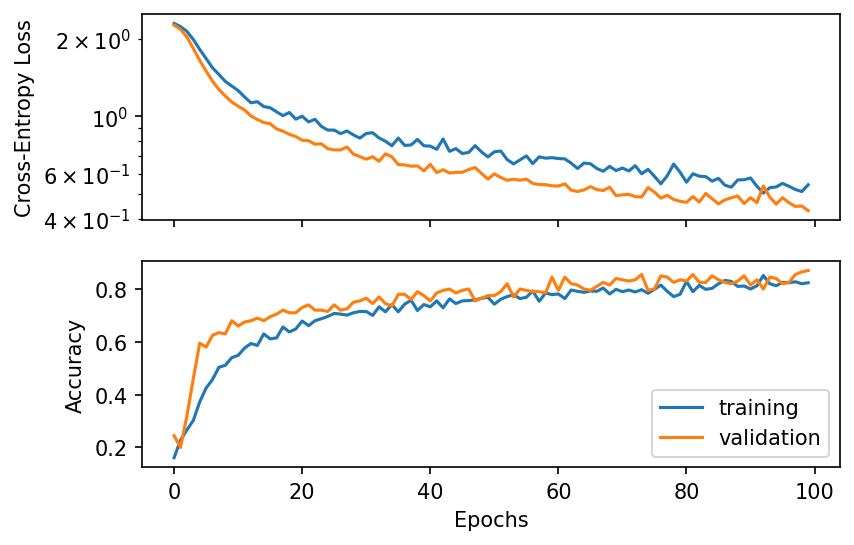

In [ ]:
dropout_model = build_model_with_dropout(num_classes, learning_rate=learning_rate)

history = dropout_model.fit(train_generator,
                              steps_per_epoch=train_steps,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=val_steps,
                              verbose=2)

plot_history(history)

In [ ]:
def build_model_with_batchnorm(num_classes, input_shape=(150,150,3), learning_rate=1e-3, summary=True):
  
  input_img = layers.Input(shape=input_shape)

  x = tf.keras.layers.Conv2D( filters = 16 , kernel_size = 3 , strides = (1,1) , padding = 'same', activation = tf.keras.activations.relu , use_bias=False )(input_img)
  x = tf.keras.layers.MaxPool2D(pool_size=(2,2),strides = 2, padding= 'valid')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Conv2D( filters = 32 , kernel_size = 3 , strides = (1,1) , padding = 'same', activation = tf.keras.activations.relu, use_bias=False )(x)
  x = tf.keras.layers.MaxPool2D(pool_size=(2,2),strides = 2, padding= 'valid')(x)
  x = tf.keras.layers.BatchNormalization()(x)

  x = tf.keras.layers.Conv2D( filters = 64 , kernel_size = 3 , strides = (1,1) , padding = 'same', activation = tf.keras.activations.relu, use_bias=False )(x)
  x = tf.keras.layers.BatchNormalization()(x)

  maxpool=tf.keras.layers.GlobalMaxPool2D()(x)
  output = layers.Dense(num_classes,'softmax')(maxpool) 

  model = Model(input_img, output)
  model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=learning_rate),
              metrics=['accuracy'])
  
  if summary:
    print(model.summary())
  
  return model

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 150, 150, 16)      432       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 75, 75, 16)        64        
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 75, 75, 32)        4608      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 37, 37, 32)      

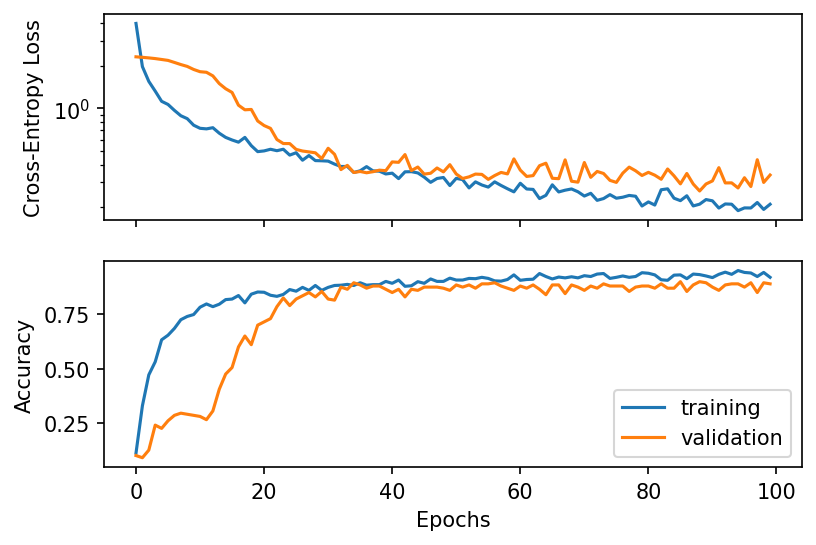

In [ ]:
batchnorm_model = build_model_with_batchnorm(num_classes, learning_rate=learning_rate)

history = batchnorm_model.fit(train_generator,
                              steps_per_epoch=train_steps,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=val_steps,
                              verbose=2)

plot_history(history)